<a href="https://colab.research.google.com/github/Vladcuhandra/AUDI-RS-MOD/blob/main/notebooks/HFST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Galīgo automātu lietojums morfoloģijā | Finite state automata for morphology

Helsinki Finite State Transdusers (HFST)

Skat. arī.: https://github.com/hfst/compmorph-course/tree/v1.0

In [106]:
!pip install hfst
# !pip install hfst_dev
#!pip install graphviz

In [107]:
import hfst
# import hfst_dev
#import graphviz
from IPython.display import Image

In [108]:
# help(hfst)
# help(hfst.compile_lexc_file)
# help(hfst.compile_twolc_file)

## Leksikona izveide

Leksikona veido:
1. Saraksts ar vairāksimbolu virknēm, ko izmanto FST aprakstīta morfoloģija (Multichar_Symbols)
2. Sakņu/celmu/morfēmu leksikons (LEXICON)
3. Morfotaktika (piemērā LEXICON N4dekl)

Simbols "!" tiek lietots kā komentāra simbols

```
Multichar_Symbols
        +N      ! Noun tag
        +Sg     ! Singular
        +Pl     ! Plural
        +Nom
        +Gen
        +Dat
        +Acc
        +Loc

!Define root lexicon
LEXICON Root
  Nouns ; ! No input, no output

!Define noun lexicon
LEXICON Nouns
  rok N4dekl ;

! Define 4th declension paradigm
LEXICON N4dekl
+N+Sg+Nom:^a  # ;
+N+Sg+Gen:^as # ;
+N+Sg+Dat:^ai # ;
+N+Sg+Acc:^u # ;
+N+Sg+Loc:^ā # ;
+N+Pl+Nom:^as  # ;
+N+Pl+Gen:^u  # ;
+N+Pl+Dat:^ām # ;
+N+Pl+Acc:^as # ;
+N+Pl+Loc:^ās # ;

```



In [109]:
# Leksikona augšuplāde no faila
!wget https://github.com/Vladcuhandra/MD1/blob/main/Latvian.lexc
#!wget https://raw.githubusercontent.com/LUMII-AILab/NLP_Course/main/notebooks/resources/HFST/roka.lexc

--2025-05-15 17:39:09--  https://github.com/Vladcuhandra/MD1/blob/main/Latvian
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Latvian’

Latvian                 [ <=>                ] 168.86K  --.-KB/s    in 0.05s   

2025-05-15 17:39:10 (3.43 MB/s) - ‘Latvian’ saved [172914]



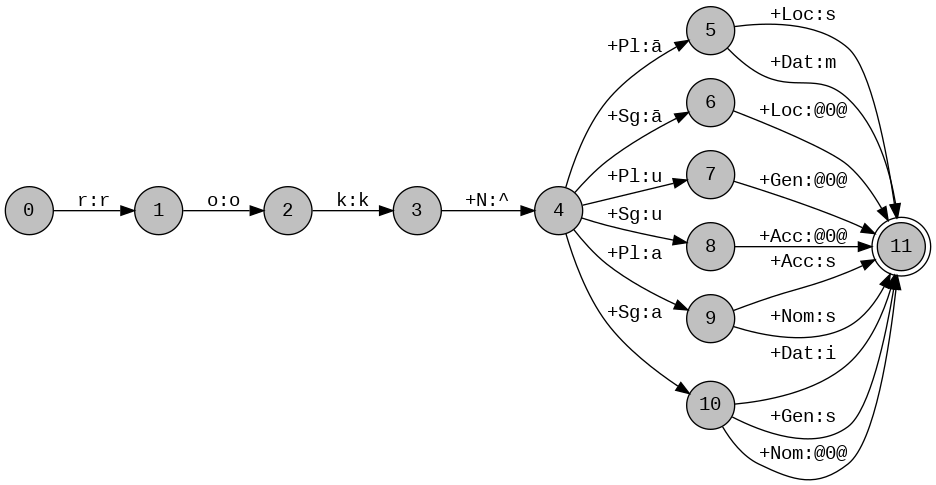

In [110]:
from hfst import compile_lexc_file
generator = hfst.compile_lexc_file('Latvian.lexc')
#generator = hfst.compile_lexc_file('roka.lexc')
#generator = hfst.compile_lexc_file('maja.lexc')
print(generator.lookup('šķīv+N+Sg+Loc'))
print (generator)


(('šķīv^ī@_EPSILON_SYMBOL_@', 0.0),)
0	1	r	r	0
0	2	a	a	0
0	3	m	m	0
0	4	e	e	0
0	5	v	v	0
0	6	j	j	0
0	7	z	z	0
0	8	š	š	0
0	9	d	d	0
1	10	o	o	0
2	11	l	l	0
3	12	a	a	0
4	13	z	z	0
5	14	ē	ē	0
6	15	ū	ū	0
7	16	ē	ē	0
8	17	ķ	ķ	0
9	18	z	z	0
10	13	n	n	0
11	19	g	g	0
12	19	s	s	0
13	20	+N	^	0
14	21	j	j	0
15	19	r	r	0
16	21	n	n	0
17	22	ī	ī	0
18	23	ī	ī	0
19	24	+N	^	0
20	25	+Sg	i	0
20	26	+Sg	M	0
20	27	+Pl	M	0
20	28	+Sg	ī	0
21	29	+N	^	0
22	13	v	v	0
23	30	v	v	0
24	28	+Sg	ā	0
24	31	+Sg	u	0
24	32	+Pl	u	0
24	33	+Sg	a	0
24	34	+Pl	ā	0
24	35	+Pl	a	0
25	36	+Acc	@0@	0
25	36	+Nom	s	0
25	36	+Dat	m	0
26	36	+Gen	a	0
27	36	+Nom	i	0
27	37	+Dat	i	0
27	38	+Loc	o	0
27	36	+Gen	u	0
27	38	+Acc	u	0
28	36	+Loc	@0@	0
29	39	+Pl	i	0
29	40	+Pl	o	0
29	41	+Sg	s	0
29	28	+Sg	ā	0
29	31	+Sg	u	0
29	42	+Pl	u	0
29	43	+Sg	a	0
30	44	n	n	0
31	36	+Acc	@0@	0
32	36	+Gen	@0@	0
33	36	+Dat	i	0
33	36	+Nom	@0@	0
33	36	+Gen	s	0
34	36	+Dat	m	0
34	36	+Loc	s	0
35	36	+Nom	s	0
35	36	+Acc	s	0
36	0
37	45	@0@	e	0
38	36	@0@	s	0
39	36	+Nom	@0@	0
39	45	+Dat	e	0
40	36

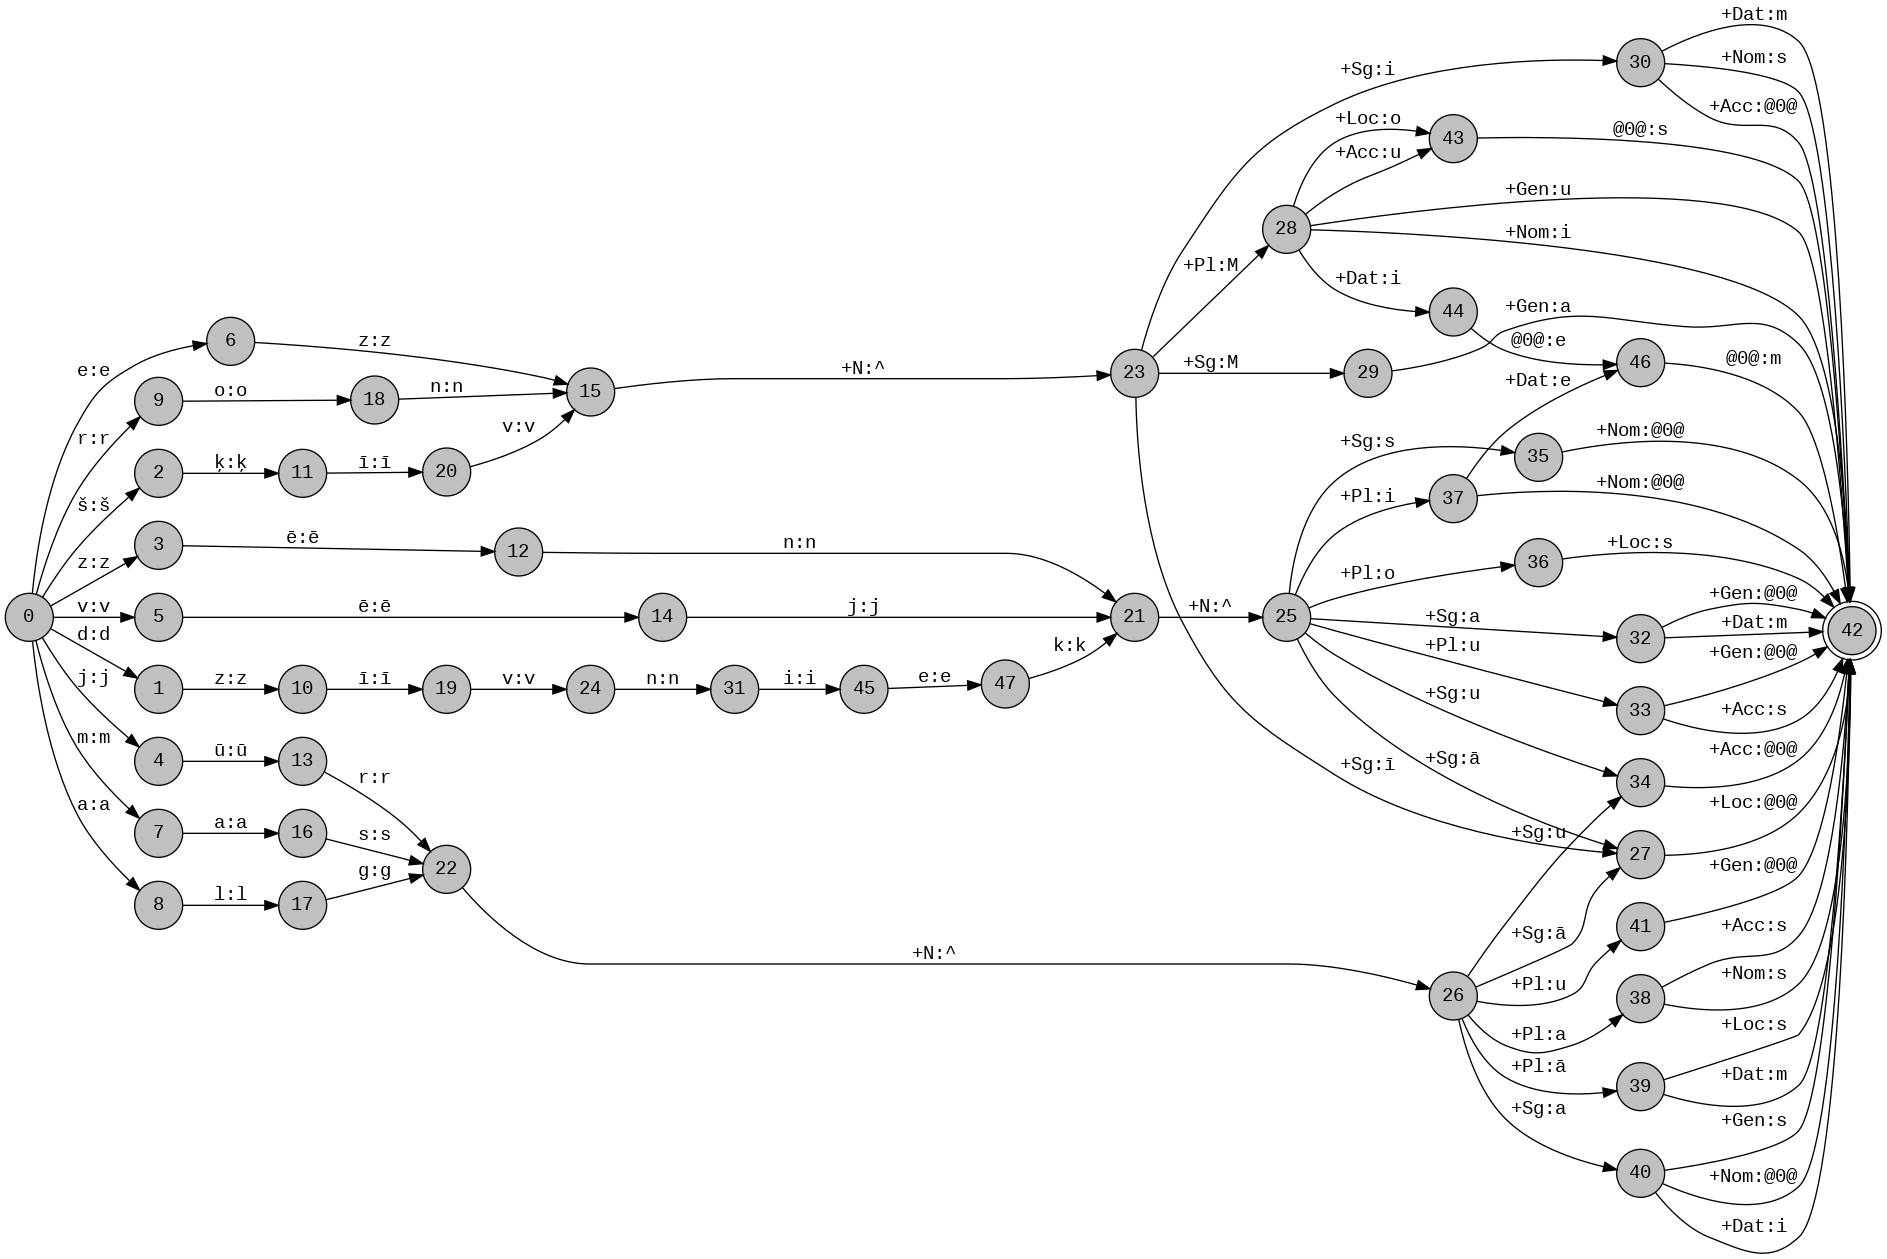

In [111]:
# Vizualizācija
hfst2png(generator,'generator.png')
Image('generator.png')

## Transdjūseri: divlīmeņu morfoloģija | Transducers: two-level morphology


In [112]:
# Sintēze | Synthesis
from hfst import HfstTransducer

analyzer = HfstTransducer(generator) # Create a copy

print(analyzer.lookup('alg+N+Sg+Nom'))

(('alg^a@_EPSILON_SYMBOL_@', 0.0),)


In [113]:
# Analīze | Analysis
# We need to invert the transducer to get an analyzer.
# After inversion, it is good to minimize the transducer
# (i.e. reduce it to an equivalent transducer with the smallest number of states).

analyzer.invert()
analyzer.minimize()

print(analyzer.lookup('alg^ā'))

(('alg+N+Sg+Loc', 0.0),)


In [114]:
# Salīdzināšana | Comparison

analyzer.invert()
analyzer.minimize()

print(analyzer.compare(generator))

True


## FST kaskadēšana | FST cascading

Pārveidošanas likumi:

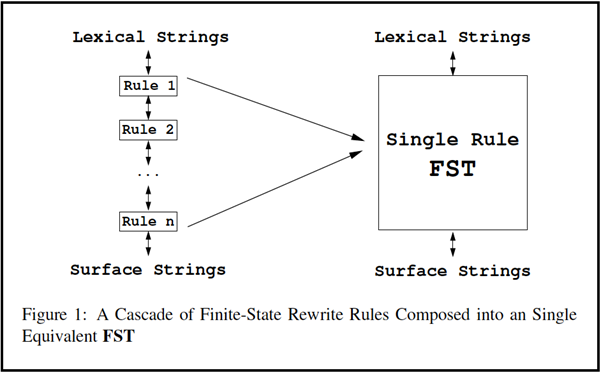

In [115]:
from hfst import regex, HfstTransducer

### Iespraušana

In [116]:
# Insertion
InsertJ = hfst.regex('[..] -> j || [b | f | m | p | v] _ "^" M')
print(InsertJ.lookup("šķīv^Ma'"))

(("šķīvj^Ma'", 0.0),)


### Aizstāšana

In [117]:
# Replacement
CReplacement = hfst.regex('z -> ž, n -> ņ ||  _ "^" M')
print(CReplacement.lookup("ez^Ma'"))
print(CReplacement.lookup("ron^Ma'"))

(("ež^Ma'", 0.0),)
(("roņ^Ma'", 0.0),)


### Izņēmumi

In [118]:
# Exceptions
#Exceptions = hfst.regex('[[{puik} "+N" "+Sg" "+Dat" .x. {puikam}] ]')
Exceptions = hfst.regex('s -> š || v ē j "^"  _')
print(Exceptions.lookup("vēj^s"))

(('vēj^š', 0.0),)


### Dzēšana

In [119]:
# Deleting
MCleanup = hfst.regex('M -> 0')
Cleanup = hfst.regex('"^" -> 0')
print(MCleanup.lookup("ez^Ma'"))

(("ez^@_EPSILON_SYMBOL_@a'", 0.0),)


## FST apvienošana | FST composition

In [120]:
from hfst import compose

# Sintēze | Generation
cascade = compose((generator, InsertJ, CReplacement, Exceptions, MCleanup, Cleanup))
print(cascade.lookup("mas+N+Pl+Loc"))
print(cascade.lookup("jūr+N+Sg+Dat"))

(('mas@_EPSILON_SYMBOL_@ās', 0.0),)
(('jūr@_EPSILON_SYMBOL_@ai', 0.0),)


In [121]:
# If you use the HFST library, you will need to remove the epsilon symbol.
cascade.remove_epsilons()
print(cascade.lookup("mas+N+Pl+Loc")[0][0].replace("@_EPSILON_SYMBOL_@", ""))

masās


In [122]:
# Analīze | Analysis
inv = hfst.HfstTransducer(cascade)
inv.invert()
inv.convert(hfst.ImplementationType.HFST_OL_TYPE)
print(inv.lookup("masās"))
print(inv.lookup("jūrām"))

(('mas+N+Pl+Loc', 0.0),)
(('jūr+N+Pl+Dat', 0.0),)


## FST vizualizācija | FST visualization

In [123]:
import sys

def hfst2png(transducer, png_name):
    # Write the FST to a file using the att format
    f = open("a.att", "w", encoding="utf-8")
    transducer.minimize()
    transducer.write_att(f, False)

    # Convert the FST file to the dot format
    # dot format is used by graphviz library for graph visualization
    f = open("a.att", "r", encoding="utf-8")
    with open("graph.dot", "w", encoding="utf-8") as out_f:
        out_f.write('digraph G { rankdir="LR"\n')
        out_f.write('node [fontname="Tahoma",shape=circle,fontsize=14,fixedsize=true,fillcolor="grey",style=filled]\n')
        out_f.write('edge [fontname="FreeMono",fontsize=14]\n')
        for line in f.readlines():
            line = line.strip()
            row = line.split('\t')
            if len(row) >= 4:
                out_f.write('%s [label="%s"];\n' % (row[0], row[0]))
                out_f.write('%s -> %s [label="%s:%s"];\n' % (row[0], row[1], row[2], row[3]))
            elif len(row) == 1: # Final state
                out_f.write('%s [label="%s",shape=doublecircle];\n' % (row[0], row[0]))
        out_f.write('}')

    # Call graphviz dot function to generate a png file from dot file
    !dot -Tpng graph.dot > $png_name

In [124]:
# Call the transformation to png on the HFSTTransducer "cascade"
hfst2png(cascade,'image.png')

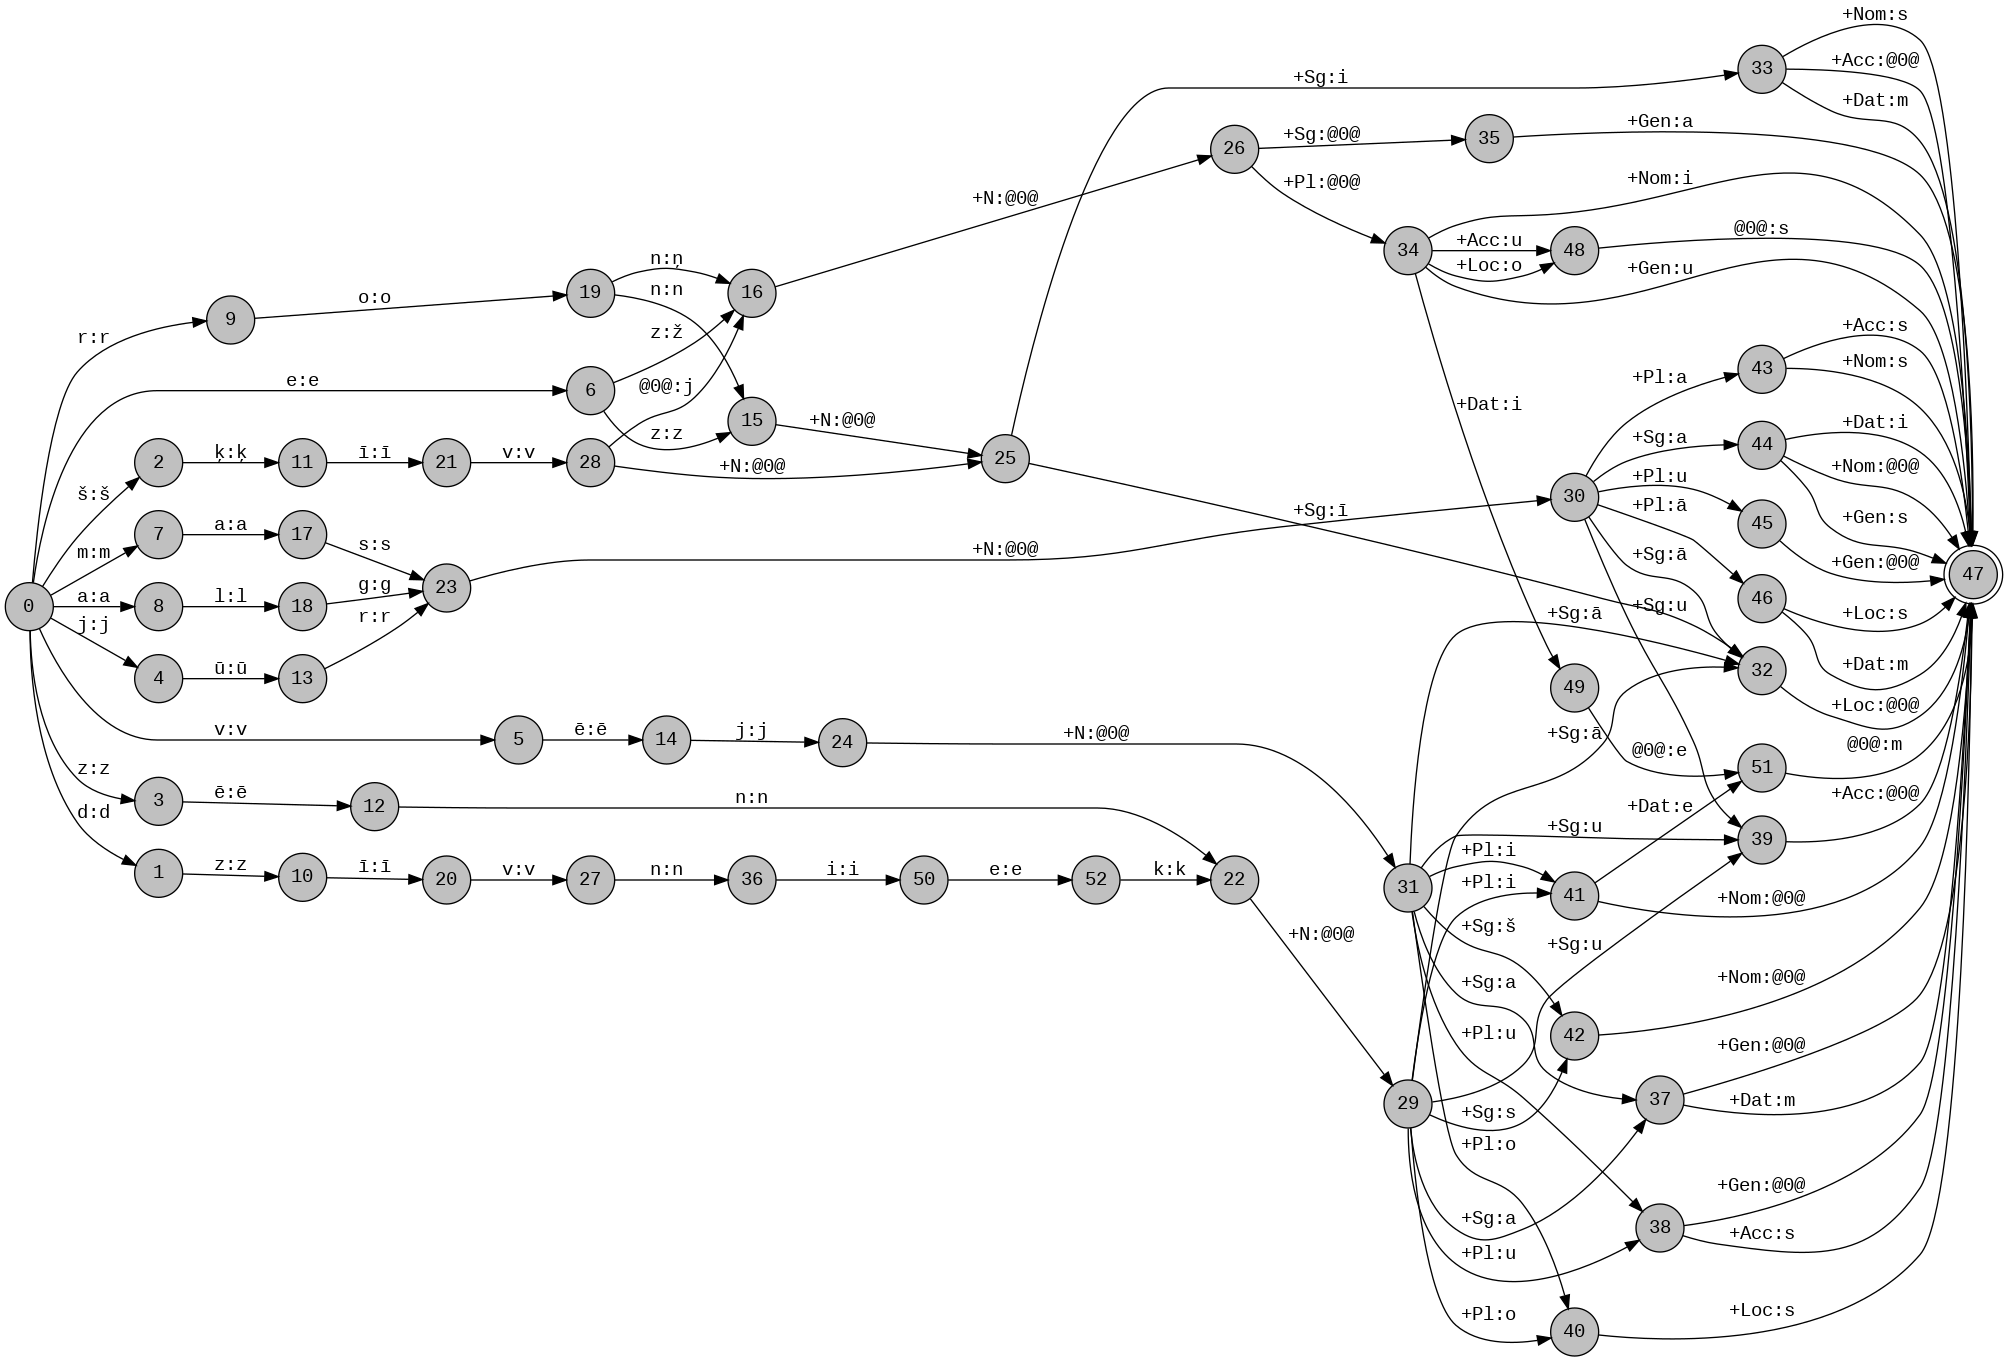

In [125]:
# Display image in notebook
# from IPython.display import Image
Image('image.png')

Izdrukāšana

In [126]:
for noun in ["vēj", "zēn", "dzīvniek", "šķīv", "ez", "ron", "mas", "jūr", "alg"]:
    for number in ["Sg", "Pl"]:
        for form in ["Nom", "Gen", "Dat", "Acc", "Loc"]:
            print(noun + "+N+" + number + "+" + form + " - " + cascade.lookup(noun + "+N+" + number + "+" + form)[0][0].replace("@_EPSILON_SYMBOL_@", ""))




vēj+N+Sg+Nom - vējš
vēj+N+Sg+Gen - vēja
vēj+N+Sg+Dat - vējam
vēj+N+Sg+Acc - vēju
vēj+N+Sg+Loc - vējā
vēj+N+Pl+Nom - vēji
vēj+N+Pl+Gen - vēju
vēj+N+Pl+Dat - vējiem
vēj+N+Pl+Acc - vējus
vēj+N+Pl+Loc - vējos
zēn+N+Sg+Nom - zēns
zēn+N+Sg+Gen - zēna
zēn+N+Sg+Dat - zēnam
zēn+N+Sg+Acc - zēnu
zēn+N+Sg+Loc - zēnā
zēn+N+Pl+Nom - zēni
zēn+N+Pl+Gen - zēnu
zēn+N+Pl+Dat - zēniem
zēn+N+Pl+Acc - zēnus
zēn+N+Pl+Loc - zēnos
dzīvniek+N+Sg+Nom - dzīvnieks
dzīvniek+N+Sg+Gen - dzīvnieka
dzīvniek+N+Sg+Dat - dzīvniekam
dzīvniek+N+Sg+Acc - dzīvnieku
dzīvniek+N+Sg+Loc - dzīvniekā
dzīvniek+N+Pl+Nom - dzīvnieki
dzīvniek+N+Pl+Gen - dzīvnieku
dzīvniek+N+Pl+Dat - dzīvniekiem
dzīvniek+N+Pl+Acc - dzīvniekus
dzīvniek+N+Pl+Loc - dzīvniekos
šķīv+N+Sg+Nom - šķīvis
šķīv+N+Sg+Gen - šķīvja
šķīv+N+Sg+Dat - šķīvim
šķīv+N+Sg+Acc - šķīvi
šķīv+N+Sg+Loc - šķīvī
šķīv+N+Pl+Nom - šķīvji
šķīv+N+Pl+Gen - šķīvju
šķīv+N+Pl+Dat - šķīvjiem
šķīv+N+Pl+Acc - šķīvjus
šķīv+N+Pl+Loc - šķīvjos
ez+N+Sg+Nom - ezis
ez+N+Sg+Gen - eža
ez+N+Sg+Dat - ez